<a href="https://colab.research.google.com/github/Dhary-Salih/Lab8/blob/main/Loan_Eligibility_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:**

* Machine Learning task: Classification model
* Target variable: Loan_Status
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [19]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [20]:
# check the number of rows and observations
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 614
Number of columns: 13


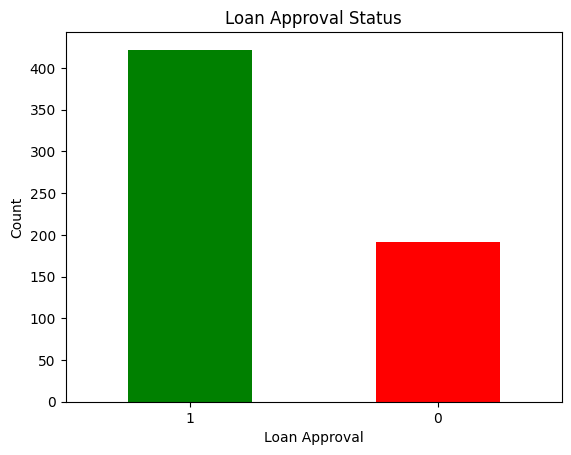

In [21]:
# Count the number of approved and denied loan applications
approval_counts = df['Loan_Approved'].value_counts()

# Plot a bar plot
approval_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Approval Status')
plt.xlabel('Loan Approval')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


### Data Prep

In [22]:
# drop 'Loan_ID' variable from the data. We won't need it.
# Check the columns in the DataFrame
print(df.columns)

# Drop the 'Loan_ID' variable from the data
if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)
    print("Column 'Loan_ID' successfully dropped.")
else:
    print("Column 'Loan_ID' not found in the DataFrame.")


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Approved'],
      dtype='object')
Column 'Loan_ID' successfully dropped.


In [23]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols = object_cols[object_cols != 'Loan_Status']

# Create dummy variables for object-type columns
df = pd.get_dummies(df, columns=object_cols, drop_first=True)

# Display the first few rows of the updated DataFrame
df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128,360,1,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128,360,1,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66,360,1,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120,360,1,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141,360,1,1,1,0,0,0,0,0,0,0,1


In [51]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [53]:
# Seperate the input features and target variable
X = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (491, 14)
X_test shape: (123, 14)
y_train shape: (491,)
y_test shape: (123,)


In [31]:
# check the split if interested

print(pd.concat([X_train.head(), y_train.head()], axis=1))


print(pd.concat([X_test.head(), y_test.head()], axis=1))

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
83              6000             2250.0         265               360   
90              2958             2900.0         131               360   
227             6250             1695.0         210               360   
482             2083             3150.0         128               360   
464             4166                0.0          98               360   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
83                1            1            1             0             0   
90                1            1            1             0             0   
227               1            1            1             0             1   
482               1            1            1             0             0   
464               0            1            0             0             0   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
83               0               

# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [32]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [35]:
# Fit the model on the data
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_features='auto', min_samples_leaf=1)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_features='auto')

In [38]:
# From sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the loan eligibility on testing set and calculate its accuracy.

y_pred_logistic = logistic_model.predict(X_test)


y_pred_rf = random_forest_model.predict(X_test)


accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic}')


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


Logistic Regression Accuracy: 0.7886178861788617
Random Forest Accuracy: 0.7723577235772358


In [57]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print('Confusion Matrix - Logistic Regression:')
print(conf_matrix_logistic)


Confusion Matrix - Logistic Regression:
[[18 25]
 [ 1 79]]


In [85]:
# to change the default threshold and to make it 70% and above
#(pypred[:, 1] >= 0.7).astype(int)
(pypred[:, 1] >= 0.7).astype(int)
threshold = 0.7
y_pred_logistic_thresholded = (logistic_probabilities[:, 1] >= threshold).astype(int)

print("Logistic Regression Thresholded Predictions:")
print(y_pred_logistic_thresholded)


Logistic Regression Thresholded Predictions:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 1]


In [71]:
# check how probabilities are assigned
logistic_probabilities = logistic_model.predict_proba(X_test)

print("Logistic Regression Probabilities:")
print(logistic_probabilities)


Logistic Regression Probabilities:
[[0.12297176 0.87702824]
 [0.10213633 0.89786367]
 [0.17287715 0.82712285]
 [0.2106497  0.7893503 ]
 [0.1298415  0.8701585 ]
 [0.29261607 0.70738393]
 [0.07788406 0.92211594]
 [0.16366222 0.83633778]
 [0.30222379 0.69777621]
 [0.28631631 0.71368369]
 [0.61463429 0.38536571]
 [0.22072772 0.77927228]
 [0.2207259  0.7792741 ]
 [0.25096333 0.74903667]
 [0.16039279 0.83960721]
 [0.16978063 0.83021937]
 [0.2339413  0.7660587 ]
 [0.1805129  0.8194871 ]
 [0.16971173 0.83028827]
 [0.04486176 0.95513824]
 [0.20022887 0.79977113]
 [0.1159973  0.8840027 ]
 [0.16818285 0.83181715]
 [0.17347251 0.82652749]
 [0.29804    0.70196   ]
 [0.33579689 0.66420311]
 [0.42475393 0.57524607]
 [0.1426804  0.8573196 ]
 [0.1168043  0.8831957 ]
 [0.07791124 0.92208876]
 [0.14345311 0.85654689]
 [0.10516719 0.89483281]
 [0.16773759 0.83226241]
 [0.28414275 0.71585725]
 [0.29004227 0.70995773]
 [0.90778376 0.09221624]
 [0.23028853 0.76971147]
 [0.17841619 0.82158381]
 [0.07943249 0.

## <font color='chocolate'>**2. Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier


In [88]:
# Let's list the tunable hyperparameters for Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with tunable hyperparameters
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto'
)


For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 0.33],
    'min_samples_leaf': [1, 3, 5, 10]
}

